In [1]:
#importing necessary libraries 
import os
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

In [3]:
# Directory containing your images
image_dir = r"C:\Users\HP\Desktop\Pose estimation\test images"

# Get a list of image files in the specified directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png')]

In [23]:
# Initialize MediaPipe Pose model
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2,enable_segmentation=True)

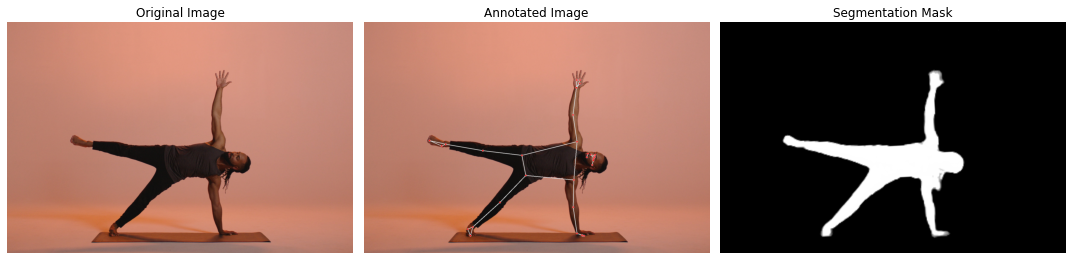

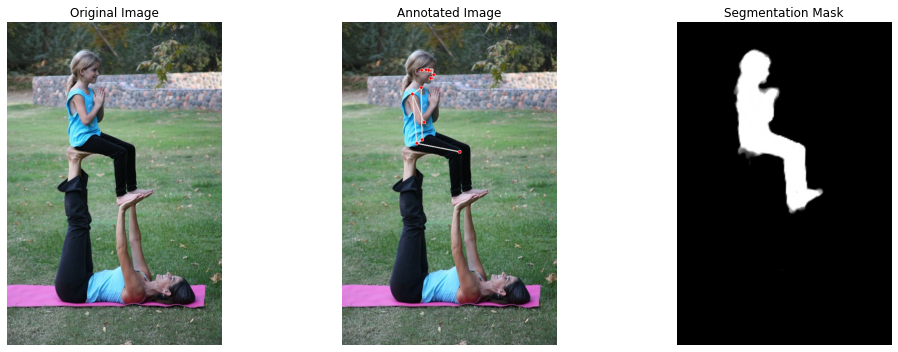

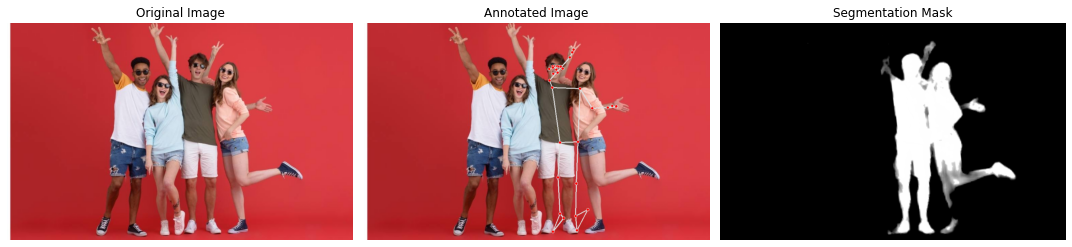

No pose landmarks found in: pose3.jpg


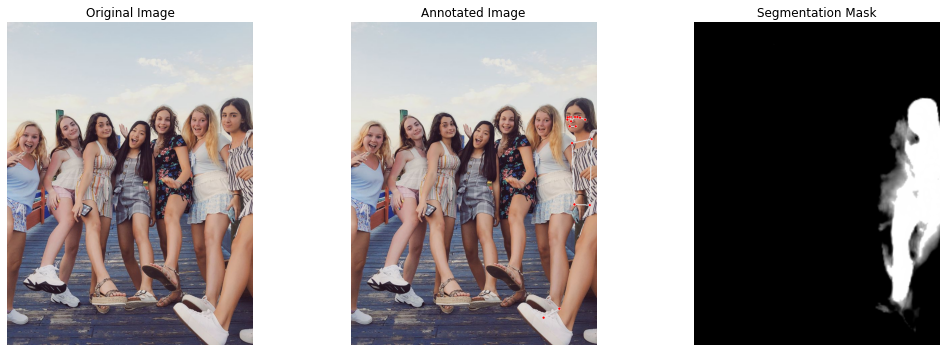

In [30]:
for image_file in image_files:
    """
    Load an image, perform pose estimation, annotate it, and display it.

    Args:
        image_path (str): The path to the input image file.
        threshold (float): The confidence threshold for keypoints to be displayed.

    Returns:
        None
    """
    
    # Load image
    image_path = os.path.join(image_dir, image_file)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform pose estimation
    results = pose.process(image_rgb)
    
    # Draw pose landmarks on the image
    if results.pose_landmarks:
        annotated_image = image.copy()
        mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Check if segmentation mask exists in results
        if results.segmentation_mask is not None:

            # Convert the segmentation mask to grayscale (0-255)
            grayscale_mask = (results.segmentation_mask * 255).astype(np.uint8)
            
            # Plot original image, annotated image, and segmentation mask side by side
            plt.figure(figsize=(15, 5))
            
            plt.subplot(1, 3, 1)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title('Original Image')
            plt.axis('off')
            
            plt.subplot(1, 3, 2)
            plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
            plt.title('Annotated Image')
            plt.axis('off')

            plt.subplot(1, 3, 3)
            plt.imshow(grayscale_mask, cmap='gray')
            plt.title('Segmentation Mask')
            plt.axis('off')
            
            plt.tight_layout()
            plt.show()
    
            print("=" * 150)  # Separator line
        else:
            print(f'No segmentation mask found in: {image_file}')
            print("=" * 150)  # Separator line
    else:
        print(f'No pose landmarks found in: {image_file}')
        print("=" * 150)  # Separator line